In [2]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
#load dataset
sales = pd.read_csv("data/customer_data_raw.csv")
sales.head()

,CustomerID,fullName,Gender,Age,Region,Product,Quantity,Price($),PurchaseDate,Feedback,IsMember
0,201.0,Alice Johnson,F,29,North,Laptop,1,$850.50,2023/04/12,Good,Yes
1,202.0,micheal SMITH,Male,thirty,south,Phone,2,300,2023-11-01,Excellent,no
2,203.0,Sarah lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,Y
3,204.0,David-Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,n
4,205.0,NaN,Female,42,north,Earphones,5,75,2021/07/05,Good,yes


In [4]:
region = pd.read_csv("data/region_sales_data.csv")
region.head()

,Region,TargetSales($),Manager,ContactEmail
0,north,12000,Grace Anthony,grace.anthony@company.com
1,south,10000,Paul Walker,paul_walker@company.com
2,east,8500,Diana Lee,diana.lee@company.com
3,west,9000,John Kim,john.kim@company.com
4,central,9500,Susan Ade,susan_ade@company.com


In [5]:
#check info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    9 non-null      float64
 1   fullName      9 non-null      object 
 2   Gender        10 non-null     object 
 3   Age           9 non-null      object 
 4   Region        10 non-null     object 
 5   Product       10 non-null     object 
 6   Quantity      10 non-null     int64  
 7   Price($)      9 non-null      object 
 8   PurchaseDate  10 non-null     object 
 9   Feedback      8 non-null      object 
 10  IsMember      10 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1008.0+ bytes


In [6]:
sales.isnull().sum()

CustomerID      1
fullName        1
Gender          0
Age             1
Region          0
Product         0
Quantity        0
Price($)        1
PurchaseDate    0
Feedback        2
IsMember        0
dtype: int64

In [7]:
sales.rename(columns={
    'CustomerID': 'customer_id',
    'fullName': 'full_name',
    'Gender': 'gender',
    'Age': 'age',
    'Region': 'region',
    'Product': 'product',
    'Quantity': 'quantity',
    'Price($)': 'price',
    'PurchaseDate': 'purchase_date',
    'Feedback': 'feedback',
    'IsMember': 'is_member'
}, inplace=True)
sales.head(10)

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,North,Laptop,1,$850.50,2023/04/12,Good,Yes
1,202.0,micheal SMITH,Male,thirty,south,Phone,2,300,2023-11-01,Excellent,no
2,203.0,Sarah lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,Y
3,204.0,David-Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,n
4,205.0,NaN,Female,42,north,Earphones,5,75,2021/07/05,Good,yes
5,206.0,john brown,m,27,marketing,Laptop,1,"1,200",2024/10/14,Poor,No
6,NaN,Emma Wilson,F,33,East,Charger,2,25,2022/12/01,Good,Yes
7,208.0,TOM davis,M,30,South,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,Female,NaN,HR,Phone,2,310,2023/05/10,bad,N
9,210.0,Chris taylor,male,28,south,Charger,3,30,2024/02/05,Excellent,TRUE


In [8]:
region.rename(columns={
    'Region': 'region',
    'TargetSales($)': 'target_sales',
    'Manager': 'manager',
    'ContactEmail': 'contact_email' 
}, inplace=True)

region.head(10)

,region,target_sales,manager,contact_email
0,north,12000,Grace Anthony,grace.anthony@company.com
1,south,10000,Paul Walker,paul_walker@company.com
2,east,8500,Diana Lee,diana.lee@company.com
3,west,9000,John Kim,john.kim@company.com
4,central,9500,Susan Ade,susan_ade@company.com
5,north-east,8700,Peter Obi,peter.obi@company.com
6,south-west,9100,Michael Adigun,michael.adigun@company.com
7,south-east,8800,Jane Stone,jane_stone@company.com
8,north-west,8900,Mary Daniels,mary.daniels@company.com
9,mid-west,8600,Henry Thomas,henry.thomas@company.com


In [9]:
#ensure consistent value
sales['full_name'] = sales['full_name'].str.title()
sales['full_name'] = sales['full_name'].str.replace('-', ' ')

sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,North,Laptop,1,$850.50,2023/04/12,Good,Yes
1,202.0,Micheal Smith,Male,thirty,south,Phone,2,300,2023-11-01,Excellent,no
2,203.0,Sarah Lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,Y
3,204.0,David Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,n
4,205.0,NaN,Female,42,north,Earphones,5,75,2021/07/05,Good,yes
5,206.0,John Brown,m,27,marketing,Laptop,1,"1,200",2024/10/14,Poor,No
6,NaN,Emma Wilson,F,33,East,Charger,2,25,2022/12/01,Good,Yes
7,208.0,Tom Davis,M,30,South,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,Female,NaN,HR,Phone,2,310,2023/05/10,bad,N
9,210.0,Chris Taylor,male,28,south,Charger,3,30,2024/02/05,Excellent,TRUE


In [10]:
sales['gender'] = sales['gender'].str.lower()
sales['gender'] = sales['gender'].replace({
    'f': 'F',
    'male': 'M',
    'm': 'M',
    'female': 'F'
})
sales.head(10)

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,North,Laptop,1,$850.50,2023/04/12,Good,Yes
1,202.0,Micheal Smith,M,thirty,south,Phone,2,300,2023-11-01,Excellent,no
2,203.0,Sarah Lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,Y
3,204.0,David Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,n
4,205.0,NaN,F,42,north,Earphones,5,75,2021/07/05,Good,yes
5,206.0,John Brown,M,27,marketing,Laptop,1,"1,200",2024/10/14,Poor,No
6,NaN,Emma Wilson,F,33,East,Charger,2,25,2022/12/01,Good,Yes
7,208.0,Tom Davis,M,30,South,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,HR,Phone,2,310,2023/05/10,bad,N
9,210.0,Chris Taylor,M,28,south,Charger,3,30,2024/02/05,Excellent,TRUE


In [11]:
sales['region'] = sales['region'].str.lower().str.strip()
sales['region'] = sales['region'].replace({
    'marketing': np.nan,
    'hr': np.nan
})
sales.head(10)

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,north,Laptop,1,$850.50,2023/04/12,Good,Yes
1,202.0,Micheal Smith,M,thirty,south,Phone,2,300,2023-11-01,Excellent,no
2,203.0,Sarah Lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,Y
3,204.0,David Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,n
4,205.0,NaN,F,42,north,Earphones,5,75,2021/07/05,Good,yes
5,206.0,John Brown,M,27,NaN,Laptop,1,"1,200",2024/10/14,Poor,No
6,NaN,Emma Wilson,F,33,east,Charger,2,25,2022/12/01,Good,Yes
7,208.0,Tom Davis,M,30,south,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310,2023/05/10,bad,N
9,210.0,Chris Taylor,M,28,south,Charger,3,30,2024/02/05,Excellent,TRUE


In [12]:
sales['is_member'] = sales['is_member'].astype(str).str.lower().str.strip()
sales['is_member'] = sales['is_member'].replace({
    'yes': True,
    'no': False,
    'y': True,
    'n': False,
    'true': True
})
sales.head(10)

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_24008\1664386001.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales['is_member'] = sales['is_member'].replace({


,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,north,Laptop,1,$850.50,2023/04/12,Good,True
1,202.0,Micheal Smith,M,thirty,south,Phone,2,300,2023-11-01,Excellent,False
2,203.0,Sarah Lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,True
3,204.0,David Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,False
4,205.0,NaN,F,42,north,Earphones,5,75,2021/07/05,Good,True
5,206.0,John Brown,M,27,NaN,Laptop,1,"1,200",2024/10/14,Poor,False
6,NaN,Emma Wilson,F,33,east,Charger,2,25,2022/12/01,Good,True
7,208.0,Tom Davis,M,30,south,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310,2023/05/10,bad,False
9,210.0,Chris Taylor,M,28,south,Charger,3,30,2024/02/05,Excellent,True


In [13]:
sales['feedback'] = sales['feedback'].str.title()
sales.head(10)

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29,north,Laptop,1,$850.50,2023/04/12,Good,True
1,202.0,Micheal Smith,M,thirty,south,Phone,2,300,2023-11-01,Excellent,False
2,203.0,Sarah Lee,F,26,east,Laptop,1,$950,2024/01/18,NaN,True
3,204.0,David Kim,M,31,west,Tablet,3,NaN,2022/09/25,Average,False
4,205.0,NaN,F,42,north,Earphones,5,75,2021/07/05,Good,True
5,206.0,John Brown,M,27,NaN,Laptop,1,"1,200",2024/10/14,Poor,False
6,NaN,Emma Wilson,F,33,east,Charger,2,25,2022/12/01,Good,True
7,208.0,Tom Davis,M,30,south,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310,2023/05/10,Bad,False
9,210.0,Chris Taylor,M,28,south,Charger,3,30,2024/02/05,Excellent,True


In [14]:
sales['age'] = sales['age'].replace({
    'thirty': 30,
    'NaN': np.nan
})
sales['age'] = pd.to_numeric(sales['age'], errors='coerce')
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,$850.50,2023/04/12,Good,True
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300,2023-11-01,Excellent,False
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,$950,2024/01/18,NaN,True
3,204.0,David Kim,M,31.0,west,Tablet,3,NaN,2022/09/25,Average,False
4,205.0,NaN,F,42.0,north,Earphones,5,75,2021/07/05,Good,True
5,206.0,John Brown,M,27.0,NaN,Laptop,1,"1,200",2024/10/14,Poor,False
6,NaN,Emma Wilson,F,33.0,east,Charger,2,25,2022/12/01,Good,True
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310,2023/05/10,Bad,False
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30,2024/02/05,Excellent,True


In [15]:
sales['price'] = (
    sales['price']
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

sales['price'] = pd.to_numeric(sales['price'], errors='coerce')
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023/04/12,Good,True
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-11-01,Excellent,False
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024/01/18,NaN,True
3,204.0,David Kim,M,31.0,west,Tablet,3,NaN,2022/09/25,Average,False
4,205.0,NaN,F,42.0,north,Earphones,5,75.0,2021/07/05,Good,True
5,206.0,John Brown,M,27.0,NaN,Laptop,1,1200.0,2024/10/14,Poor,False
6,NaN,Emma Wilson,F,33.0,east,Charger,2,25.0,2022/12/01,Good,True
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023/03/22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310.0,2023/05/10,Bad,False
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024/02/05,Excellent,True


In [16]:
from dateutil import parser

def date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT

sales['purchase_date'] = sales['purchase_date'].apply(date_parser)
sales


,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,NaN,True
3,204.0,David Kim,M,31.0,west,Tablet,3,NaN,2022-09-25,Average,False
4,205.0,NaN,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True
5,206.0,John Brown,M,27.0,NaN,Laptop,1,1200.0,2024-10-14,Poor,False
6,NaN,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,NaN,True
8,209.0,Jane Miller,F,NaN,NaN,Phone,2,310.0,2023-10-05,Bad,False
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True


In [17]:
sales['customer_id'] = sales['customer_id'].fillna(207.0)
sales['full_name'] = sales['full_name'].fillna("Unknown")
sales['age'] = sales['age'].fillna(sales['age'].median())
sales['region'] = sales['region'].fillna(sales['region'].mode()[0])
sales['price'] = sales['price'].fillna(sales['price'].median())
sales['feedback'] = sales['feedback'].fillna("No Feedback")
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,No Feedback,True
3,204.0,David Kim,M,31.0,west,Tablet,3,310.0,2022-09-25,Average,False
4,205.0,Unknown,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True
5,206.0,John Brown,M,27.0,south,Laptop,1,1200.0,2024-10-14,Poor,False
6,207.0,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,No Feedback,True
8,209.0,Jane Miller,F,30.0,south,Phone,2,310.0,2023-10-05,Bad,False
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True


In [18]:
sales['total_sales'] = sales['quantity'] * sales['price']
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member,total_sales
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True,850.5
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False,600.0
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,No Feedback,True,950.0
3,204.0,David Kim,M,31.0,west,Tablet,3,310.0,2022-09-25,Average,False,930.0
4,205.0,Unknown,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True,375.0
5,206.0,John Brown,M,27.0,south,Laptop,1,1200.0,2024-10-14,Poor,False,1200.0
6,207.0,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True,50.0
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,No Feedback,True,800.0
8,209.0,Jane Miller,F,30.0,south,Phone,2,310.0,2023-10-05,Bad,False,620.0
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True,90.0


In [19]:
def age_group(age):
    if 18 <= age <= 25:
        return "Youth"
    elif 26 <= age <= 35:
        return "Adult"
    elif 36 <= age <= 50:
        return "Mature"
    else:
        return "Teenage"

sales['age_group'] = sales['age'].apply(age_group)
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member,total_sales,age_group
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True,850.5,Adult
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False,600.0,Adult
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,No Feedback,True,950.0,Adult
3,204.0,David Kim,M,31.0,west,Tablet,3,310.0,2022-09-25,Average,False,930.0,Adult
4,205.0,Unknown,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True,375.0,Mature
5,206.0,John Brown,M,27.0,south,Laptop,1,1200.0,2024-10-14,Poor,False,1200.0,Adult
6,207.0,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True,50.0,Adult
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,No Feedback,True,800.0,Adult
8,209.0,Jane Miller,F,30.0,south,Phone,2,310.0,2023-10-05,Bad,False,620.0,Adult
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True,90.0,Adult


In [20]:
sales['year'] = sales['purchase_date'].dt.year
sales

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member,total_sales,age_group,year
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True,850.5,Adult,2023
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False,600.0,Adult,2023
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,No Feedback,True,950.0,Adult,2024
3,204.0,David Kim,M,31.0,west,Tablet,3,310.0,2022-09-25,Average,False,930.0,Adult,2022
4,205.0,Unknown,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True,375.0,Mature,2021
5,206.0,John Brown,M,27.0,south,Laptop,1,1200.0,2024-10-14,Poor,False,1200.0,Adult,2024
6,207.0,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True,50.0,Adult,2022
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,No Feedback,True,800.0,Adult,2023
8,209.0,Jane Miller,F,30.0,south,Phone,2,310.0,2023-10-05,Bad,False,620.0,Adult,2023
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True,90.0,Adult,2024


In [21]:
merge_df = pd.merge(sales, region, on='region', how='left')
merge_df

,customer_id,full_name,gender,age,region,product,quantity,price,purchase_date,feedback,is_member,total_sales,age_group,year,target_sales,manager,contact_email
0,201.0,Alice Johnson,F,29.0,north,Laptop,1,850.5,2023-12-04,Good,True,850.5,Adult,2023,12000,Grace Anthony,grace.anthony@company.com
1,202.0,Micheal Smith,M,30.0,south,Phone,2,300.0,2023-01-11,Excellent,False,600.0,Adult,2023,10000,Paul Walker,paul_walker@company.com
2,203.0,Sarah Lee,F,26.0,east,Laptop,1,950.0,2024-01-18,No Feedback,True,950.0,Adult,2024,8500,Diana Lee,diana.lee@company.com
3,204.0,David Kim,M,31.0,west,Tablet,3,310.0,2022-09-25,Average,False,930.0,Adult,2022,9000,John Kim,john.kim@company.com
4,205.0,Unknown,F,42.0,north,Earphones,5,75.0,2021-05-07,Good,True,375.0,Mature,2021,12000,Grace Anthony,grace.anthony@company.com
5,206.0,John Brown,M,27.0,south,Laptop,1,1200.0,2024-10-14,Poor,False,1200.0,Adult,2024,10000,Paul Walker,paul_walker@company.com
6,207.0,Emma Wilson,F,33.0,east,Charger,2,25.0,2022-01-12,Good,True,50.0,Adult,2022,8500,Diana Lee,diana.lee@company.com
7,208.0,Tom Davis,M,30.0,south,Laptop,1,800.0,2023-03-22,No Feedback,True,800.0,Adult,2023,10000,Paul Walker,paul_walker@company.com
8,209.0,Jane Miller,F,30.0,south,Phone,2,310.0,2023-10-05,Bad,False,620.0,Adult,2023,10000,Paul Walker,paul_walker@company.com
9,210.0,Chris Taylor,M,28.0,south,Charger,3,30.0,2024-05-02,Excellent,True,90.0,Adult,2024,10000,Paul Walker,paul_walker@company.com


In [22]:
revenue = merge_df['total_sales'].sum()
print("Total revenue:", revenue)

Total revenue: 6465.5


In [23]:
region_sales = merge_df.groupby('region')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
region_sales

,region,total_sales
2,south,3310.0
1,north,1225.5
0,east,1000.0
3,west,930.0


In [24]:
product_sales = merge_df.groupby('product')['total_sales'].sum().reset_index()
product_sales

,product,total_sales
0,Charger,140.0
1,Earphones,375.0
2,Laptop,3800.5
3,Phone,1220.0
4,Tablet,930.0


In [25]:
performance = region_sales.merge(region, on='region', how='left')
performance['difference'] = performance['total_sales'] - performance['target_sales']

performance['performance_status'] = np.where(
    performance['difference'] >= 0,
    "Above Target",
    "Below Target"
)

performance

,region,total_sales,target_sales,manager,contact_email,difference,performance_status
0,south,3310.0,10000,Paul Walker,paul_walker@company.com,-6690.0,Below Target
1,north,1225.5,12000,Grace Anthony,grace.anthony@company.com,-10774.5,Below Target
2,east,1000.0,8500,Diana Lee,diana.lee@company.com,-7500.0,Below Target
3,west,930.0,9000,John Kim,john.kim@company.com,-8070.0,Below Target


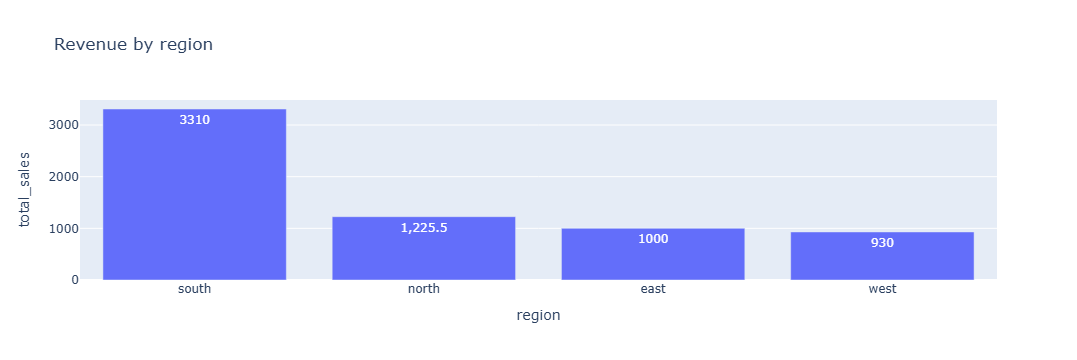

In [26]:
fig = px.bar(
    region_sales,
    x='region',
    y='total_sales',
    title='Revenue by region',
    text_auto=True
)
fig.show()

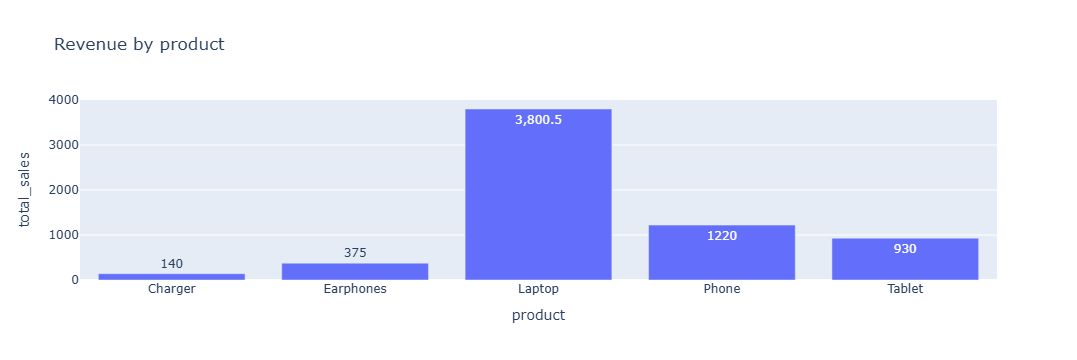

In [27]:
fig = px.bar(
    product_sales,
    x='product',
    y='total_sales',
    title='Revenue by product',
    text_auto=True
)
fig.show()

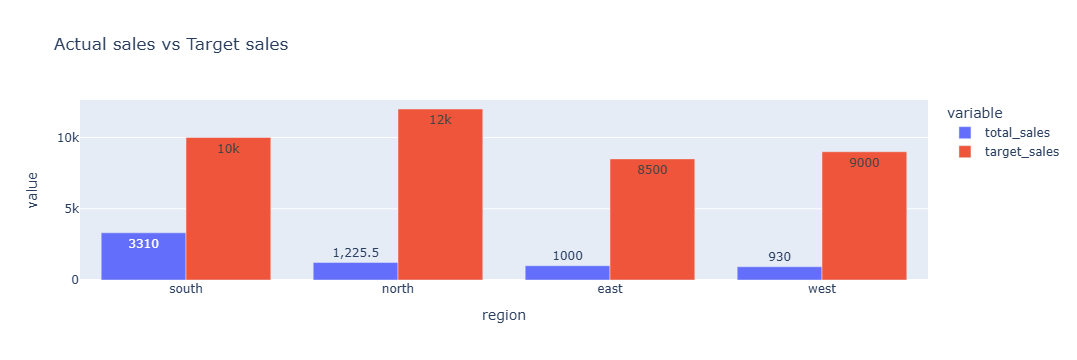

In [28]:
fig = px.bar(
    performance,
    x='region',
    y=['total_sales', 'target_sales'],
    barmode='group',
    title='Actual sales vs Target sales',
    text_auto=True
)
fig.show()

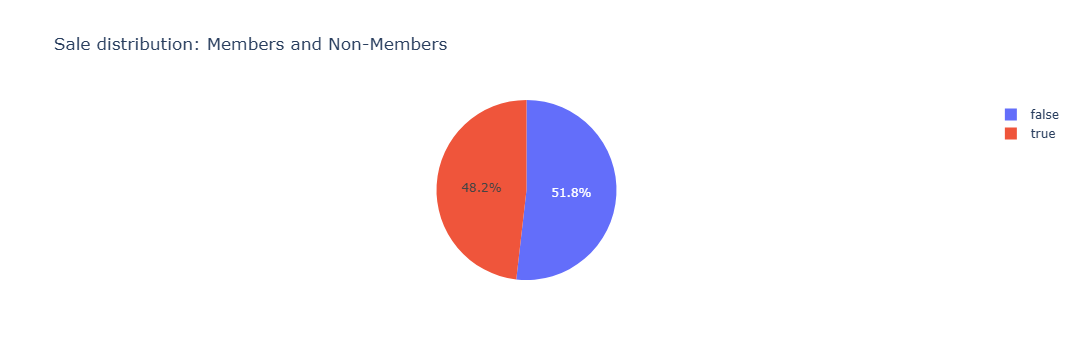

In [29]:
member_sales = merge_df.groupby("is_member")['total_sales'].sum().reset_index()

fig = px.pie(
    member_sales,
    names='is_member',
    values='total_sales',
    title="Sale distribution: Members and Non-Members"
)

fig.show()

In [30]:
merge_df.to_csv('cleaned_sales_performance.csv', index=False)